##I mports

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd 
import matplotlib
import seaborn as sns
import holoviews as hv
import matplotlib.pyplot as plt


import mpl_toolkits.mplot3d.axes3d as p3
from numpy import percentile , mean , std, array

%matplotlib inline
import matplotlib.patches as mpatches
from hyperopt import STATUS_OK, Trials, fmin, hp, tpe
from sklearn.utils import resample,shuffle
from xgboost.sklearn import XGBClassifier
from mlxtend.preprocessing import minmax_scaling
from sklearn.decomposition import PCA,SparsePCA,KernelPCA,NMF
from holoviews import opts
from sklearn import metrics, mixture, cluster, datasets
from sklearn.mixture import GaussianMixture
from sklearn.calibration import CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,roc_auc_score, roc_curve, auc
hv.extension('bokeh')
from numpy import std
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
mr = hv.renderer('matplotlib') 


import plotly as plotly                # Interactive Graphing Library for Python
import plotly.express as px
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot, plot
import plotly.offline as py
init_notebook_mode(connected=True)
import os
%pylab inline
import warnings
warnings.filterwarnings('ignore')

In [6]:
#FirstWe Define The Dataset 
df = pd.read_csv("/content/drive/My Drive/CMPS 276 Project/Nov 4/Datasets/Clean Transformed.csv")

In [13]:
#Then We split it into input(X) and output (y)
y = df["Response"]
#Droping the output column and the column created during feature engineering from clean transformed data 
X = df.drop(['Response','Age_times_Annual'],axis=1)
#Then We split in
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

# Read original Dataset

In [ ]:
Dataset=pd.read_csv('D:/cmps 276/new data- salim/allData.csv')

In [ ]:
#no duplicate rows
Dataset.duplicated(['id']).sum()

0

In [ ]:
Dataset.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28,0,> 2 Years,Yes,40454,26,217,1
1,2,Male,76,1,3,0,1-2 Year,No,33536,26,183,0
2,3,Male,47,1,28,0,> 2 Years,Yes,38294,26,27,1
3,4,Male,21,1,11,1,< 1 Year,No,28619,152,203,0
4,5,Female,29,1,41,1,< 1 Year,No,27496,152,39,0


In [ ]:
#checking for null values
Dataset.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
print("\n\nDatatypes of features: \n",'-' * 20,"\n", Dataset.dtypes)



Datatypes of features: 
 -------------------- 
 id                       int64
Gender                  object
Age                      int64
Driving_License          int64
Region_Code              int64
Previously_Insured       int64
Vehicle_Age             object
Vehicle_Damage          object
Annual_Premium           int64
Policy_Sales_Channel     int64
Vintage                  int64
Response                 int64
dtype: object


# Part 1 - Data cleaning

## Corrupting The Data

In [ ]:
#this cell takes about 5 minutes 
import random 
annual_premium_mean = Dataset["Annual_Premium"].mean()
cols = ["Age","Annual_Premium","Response","Driving_License"]
for i in range(58000): #10% of the data
    row = random.randint(0,508146) #choose a random row
    col = cols[random.randint(0,3)]
    if col == "Age":
        Dataset.loc[row,"Age"] *= -1 #turn age to a negative value
    if col == "Annual_Premium":
        Dataset.loc[row,"Annual_Premium"] = 5*(annual_premium_mean) #add 5 times the mean of the annual premium, making these values outliers
    else:
        Dataset.loc[row,col] = "NA" #missing values for "driving license" and "response"
#this cell takes about 5 minutes 

## Getting Corrupted Data, Exploring it and then Cleaning

In [ ]:
#corrupted that includes outliers,NAs
Dataset.to_csv( "Corrupted data.csv", index=False, encoding='utf-8-sig')

In [ ]:
Corrupted=pd.read_csv('E:/AUB/4th year/Fall/CMPS 276/Project/health insurance/Corrupted data.csv')

In [ ]:
Corrupted.to_csv( "Corrupted data.csv", index=False, encoding='utf-8-sig')

In [ ]:
Corrupted.isna().sum()

id                          0
Gender                      0
Age                     14297
Driving_License         14176
Region_Code                 0
Previously_Insured          0
Vehicle_Age                 0
Vehicle_Damage              0
Annual_Premium              0
Policy_Sales_Channel        0
Vintage                     0
Response                14303
dtype: int64

In [ ]:
any(Corrupted.Age<0)

False

In [ ]:
Corrupted.Age.unique()
#we can see that there is nan value because the column takes positive values. it turned the negative Age to nan

array([44., 76., 47., 21., 29., 24., 23., 56., 32., 41., 71., 37., 25.,
       42., 60., 65., 49., 34., 51., 26., 57., 79., 48., 45., 72., 30.,
       54., 27., 38., 22., 78., 20., 39., 62., 58., 59., 63., 50., 67.,
       77., 28., 69., nan, 52., 31., 33., 43., 36., 53., 70., 46., 55.,
       40., 61., 75., 64., 35., 66., 68., 74., 73., 84., 83., 81., 80.,
       82., 85.])

this code below can be used if we worked on the corrupted dataframe instead of working on the csv
because when we turn it into csv the erroneous values get turned to "nan" and so dont matter when doing arithmetic operations.
Dont run it, it will take a lot of time.

In [ ]:

# for index, row in Dataset.iterrows():
#     if  type(row["Age"]) != int:
#         Dataset.drop(index, inplace=True)
#     elif row['Age'] < 0:
#         Dataset.drop(index, inplace=True)
#     try:
#         if row['Driving_License'] not in[0,1]:#could have also used dropna but this way we can remove all data that is not boolean (0 or 1)
#             Dataset.drop(index, inplace=True)
#     except:
#         pass
#     try:
#         if row["Response"] not in [0,1]: #could have also used dropna but this way we can remove all data that is not boolean (0 or 1)
#             Dataset.drop(index, inplace=True)
#     except:
#         pass
#     #the reason for try and except is that the row we are trying to access might have already been deleted by a previous if statement

In [ ]:
#removing NA/nan values
Corrupted= Corrupted.dropna(axis = 0, how ='any')

In [ ]:
# any(Corrupted.Age<0)
Corrupted.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

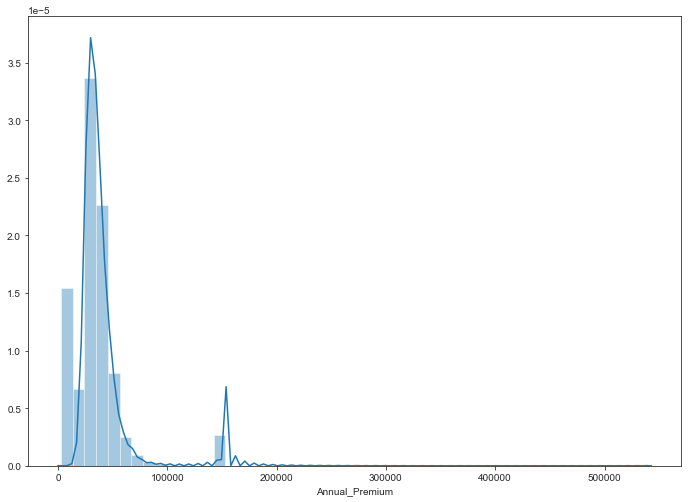

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.distplot(Corrupted.Annual_Premium,ax=ax)

In [ ]:
print("\n\nDatatypes of features: \n",'-' * 20,"\n", Corrupted.dtypes)



Datatypes of features: 
 -------------------- 
 id                        int64
Gender                    int32
Age                     float64
Driving_License         float64
Region_Code               int64
Previously_Insured        int64
Vehicle_Age               int32
Vehicle_Damage            int32
Annual_Premium          float64
Policy_Sales_Channel      int64
Vintage                   int64
Response                float64
dtype: object


In [ ]:
#splitting data to avoid data leakage
inputs=Corrupted.drop('Response',axis = 1)
outputs=Corrupted[["id", "Response"]]
#output has id so we can merge them later
Train_input,Test_input,Train_Response,Test_Response = train_test_split(inputs,outputs,test_size= 0.20,random_state=0,stratify=outputs[ "Response"],shuffle=True)

In [ ]:
#for easier plotting
Train_set=pd.merge(Train_input,Train_Response,on='id')
Test_set=pd.merge(Test_input,Test_Response,on='id')

In [ ]:
Train_set.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,31135,Female,25.0,1.0,39,1,< 1 Year,No,2630.0,160,48,0.0
1,29443,Male,23.0,1.0,24,0,< 1 Year,Yes,27224.0,151,115,0.0
2,137043,Male,32.0,1.0,41,0,< 1 Year,Yes,2630.0,124,176,0.0
3,257615,Female,22.0,1.0,33,1,< 1 Year,No,47002.0,152,63,0.0
4,345194,Female,24.0,1.0,16,1,< 1 Year,No,29396.0,152,38,0.0


as we saw from the graphs, our Annual_Premium has outliers that need to be handled. 
first, we tried the interquartile method (the cell directly below), 
but we didnt get the results we'd hoped for

In [ ]:
q25 , q75 = percentile(Train_input.Annual_Premium, 25) ,percentile(Train_input.Annual_Premium, 75)
iqr = q75 - q25

cut_off = iqr * 2
lower , upper = q25 - cut_off , q75 + cut_off

outliers_removed = [ x for x in Train_input.Annual_Premium if x > lower and x < upper]
percentage= (Train_input.shape[0]-len(outliers_removed) ) / Train_input.shape[0]
print("outlier percentage: %d" %(percentage*100))

outlier percentage: 3


In [ ]:
#takes time
for index, row in Corrupted.iterrows():
    if  (row["Annual_Premium"] <= lower) or (row["Annual_Premium"] >= upper) :
        Corrupted.drop(index, inplace=True)

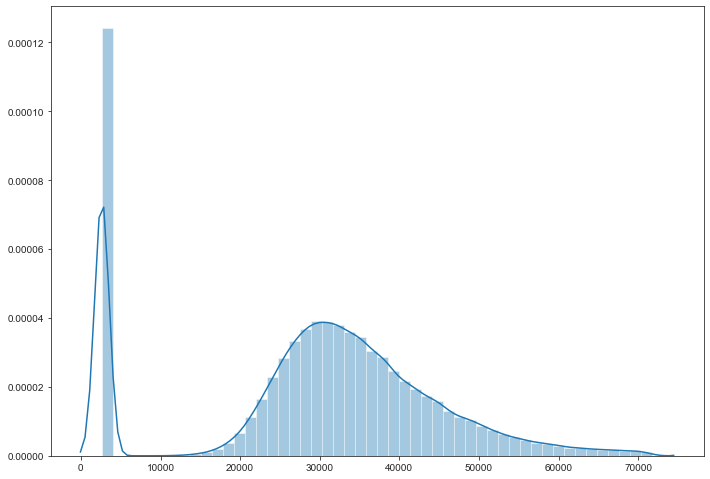

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.distplot(outliers_removed,ax=ax)

we notice that our data is gaussian-like, with the exception of the outliers at the far fight. since our data somewhat follows a normal distribution, we can try the standard deviation method to remove outliers

In [ ]:
premium_mean, premium_std = mean(Train_input.Annual_Premium), std(Train_input.Annual_Premium)
cut_off= premium_std* 3
lower , upper = premium_mean - cut_off , premium_mean + cut_off
outliers_removed = [ x for x in Train_input.Annual_Premium if x > lower and x < upper]
percentage= (Train_input.shape[0]-len(outliers_removed) ) / Train_input.shape[0]
print("outlier percentage: %d" %(percentage*100))

outlier percentage: 2


In [ ]:
for index, row in Corrupted.iterrows():
    
    if  (row["Annual_Premium"] <= lower) or (row["Annual_Premium"] >= upper) :
        Corrupted.drop(index, inplace=True)

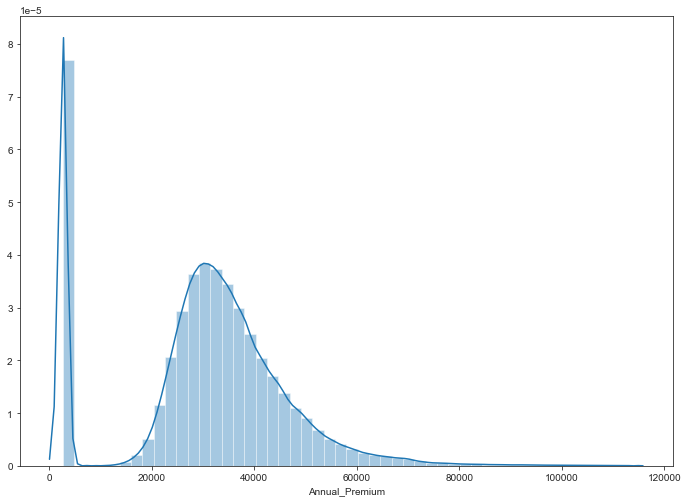

In [ ]:
sns.set_style('ticks')
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)
sns.distplot(Corrupted.Annual_Premium,ax=ax)

These low values are not outliers since they occur in high frequency, these low values indicate a trend rather than an outlier.

In [ ]:
#Saving the clean data without outliers or NAs
Corrupted.to_csv( "Clean data.csv", index=False, encoding='utf-8-sig')

# Part 2 - Feature selection
Feature selection is the process of reducing the number of input variables when developing a predictive model. It is desirable to reduce the number of input variables to both reduce the computational cost of modeling and, in many cases, to improve the performance of the model. Statistical-based feature selection methods involve evaluating the relationship between each input variable and the target variable using statistics and selecting those input variables that have the strongest relationship with the target variable.


## Recursive Feature Elimination
RFE is a wrapper-type feature selection algorithm. This means that a different machine learning algorithm is given and used in the core of the method, is wrapped by RFE, and used to help select features. RFE works by searching for a subset of features by starting with all features in the training dataset and successfully removing features until the desired number remains. 
Features are scored either using the provided machine learning model (e.g. some algorithms like decision trees offer importance scores) or by using a statistical method.


In [14]:
#Setting Classifier to Decision Trees Classifier and The RFE on my data
clf = DecisionTreeClassifier() 
rfe = RFE(estimator = clf, n_features_to_select = 5,step=1)
rfe = rfe.fit(X, y)

#Evaluating the recursive feature elimination  accuracy
pipeline = Pipeline(steps=[('s' , rfe),('m' , clf)])
cv = RepeatedKFold(n_splits=2 , n_repeats=3 , random_state=1)
n_scores = cross_val_score(pipeline, X_train, y_train , scoring='accuracy',cv=cv , n_jobs=-1)
print('Accuracy: %.3f (%.3f) '% (mean(n_scores) , std(n_scores)))

Accuracy: 0.849 (0.000) 


We used the Decision Tree Classifier model, which fits into our dataset & we chose to select 5 features by setting the n_features_to_select parameter into 5. Our strategy was using the accuracy, to make sure that our RFE is accurate, we got the following results: Accuracy 0.849 with 0.000 standard deviation. 

In [15]:
RFE_results = []
count = 0
for col in X.columns:
  RFE_results.append((rfe.ranking_[count],X.columns[count]))
  count+=1
RFE_results.sort()
RFE_results


[(1, 'Age'),
 (1, 'Annual_Premium'),
 (1, 'Region_Code'),
 (1, 'Vehicle_Damage_Yes'),
 (1, 'Vintage'),
 (2, 'Policy_Sales_Channel'),
 (3, 'Gender_Male'),
 (4, 'Gender_Female'),
 (5, 'Vehicle_Age_Ordinal'),
 (6, 'Previously_Insured_0'),
 (7, 'Driving_License_0'),
 (8, 'Driving_License_1'),
 (9, 'Vehicle_Damage_No'),
 (10, 'Previously_Insured_1')]

We can see here, that our RFE model gave us the following results by choosing the top 5 features in our dataset concerning our output. The RFE_results are sorted according to the feature ranking, and we can notice the name of the feature next to its rank.

It makes sense that the most important features are the Age of the Client, how much insurance does the client pay, whereas regarding the region code, it looks like it is am important feature so specify whether or not people are willing to buy car insurance based on where they live, some regions might demonstrate more risk on a car than others.

Whether the vehicle is damaged or not is an important feature that contributes to people's decision to buy car insurance cause. It demonstrates how much they pay for fixing their cars in case of accidents, most probably they have already have been in an accident and paid a good amount of money to fix their cars.

Other features such as vintage do contribute a lot in the people's decision since it shows the people's trust in the company, they are willing to trust them for their auto insurance, the way they trusted them on their health insurance.

Less important features such as gender demonstrate that males tend to buy car insurance from the same company that provides their health insurance and this might translate to say that men love their cars as much as they love their life.

## Feature Importance
Feature importance refers to techniques that assign a score to input features based on how useful they are at predicting a target variable. There are many types and sources of feature importance scores, although popular examples include statistical correlation scores,
coeffecients calculated as part of linear models, decision trees, and permutation importance scores. Feature importance scores play an important role in a predictive modeling project, including providing insight into the data, insight into the model, and the basis for dimen- sionality reduction and feature selection that can improve the effciciency and effectiveness of
a predictive model on the problem.

Feature importance scores can be used to help interpret the data, but they can also be used directly to help rank and select features that are most useful to a predictive model.

In [17]:
#Choosing the feature selector and fitting it using Random Forest Classifier as estimator
fs = SelectFromModel(RandomForestClassifier(max_features=5,n_estimators=500))
fs.fit(X_train,y_train)

SelectFromModel(estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                                 class_weight=None,
                                                 criterion='gini',
                                                 max_depth=None, max_features=5,
                                                 max_leaf_nodes=None,
                                                 max_samples=None,
                                                 min_impurity_decrease=0.0,
                                                 min_impurity_split=None,
                                                 min_samples_leaf=1,
                                                 min_samples_split=2,
                                                 min_weight_fraction_leaf=0.0,
                                                 n_estimators=500, n_jobs=None,
                                                 oob_score=False,
                                                 rand

In [18]:
#Changing my features based on the feature selector
X_train_fs = fs.transform(X_train)
X_test_fs = fs.transform(X_test)

In [19]:
#Fitting a Decision Tree Classifier Model
model = DecisionTreeClassifier()
model.fit(X_train_fs,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [20]:
#Evaluating my model
yhat = model.predict(X_test_fs)
accuracy = accuracy_score(y_test,yhat)
print("Accuracy %.2f"%(accuracy*100))

Accuracy 83.43


Here we're running the feature importance algorithm, where we used at first the Random Forest Classifier to create new input training and testing sets. Then we we used the Decision Tree Classifier model to fit the new input train and test sets. Then we evaluated the model, and we got an accuracy of 83.42% after predicting the new input testing set (X_test_fs).  


# Part 3 - Data Transform

In [ ]:
Clean=pd.read_csv('D:/cmps 276/new data- salim/Clean data.csv')

In [ ]:
#dropping id because it has no meaning and will distract the model
Clean.drop('id',axis=1)

In [ ]:
Clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452691 entries, 0 to 452690
Data columns (total 12 columns):
id                      452691 non-null int64
Gender                  452691 non-null int64
Age                     452691 non-null float64
Driving_License         452691 non-null float64
Region_Code             452691 non-null int64
Previously_Insured      452691 non-null int64
Vehicle_Age             452691 non-null int64
Vehicle_Damage          452691 non-null int64
Annual_Premium          452691 non-null float64
Policy_Sales_Channel    452691 non-null int64
Vintage                 452691 non-null int64
Response                452691 non-null float64
dtypes: float64(4), int64(8)
memory usage: 41.4 MB


In [ ]:
Clean['Age']=Clean['Age'].astype(int)
Clean['Driving_License']=Clean['Driving_License'].astype(int)
Clean['Annual_Premium']=Clean['Annual_Premium'].astype(int)
Clean['Response']=Clean['Response'].astype(int)

In [ ]:
Clean.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,1,44,1,28,0,2,1,40454,26,217,1
1,3,1,47,1,28,0,2,1,38294,26,27,1
2,4,1,21,1,11,1,0,0,28619,152,203,0
3,5,0,29,1,41,1,0,0,27496,152,39,0
4,6,0,24,1,33,0,0,1,2630,160,176,0


In [ ]:
data =Clean.values
data.shape

(452691, 12)

In [ ]:
inputs=data[:,1:11]
outputs=data[:,11]
inputs

array([[    1,    44,     1, ..., 40454,    26,   217],
       [    1,    47,     1, ..., 38294,    26,    27],
       [    1,    21,     1, ..., 28619,   152,   203],
       ...,
       [    0,    38,     1, ..., 28700,   122,   165],
       [    1,    21,     1, ..., 29802,   152,    74],
       [    1,    71,     1, ..., 62875,    26,   265]], dtype=int64)

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(inputs,outputs,test_size= 0.20,random_state=0,stratify=outputs,shuffle=True)

In [ ]:
X_train.shape

(362152, 10)

In [ ]:
#transforming the text into a numerical values
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, OrdinalEncoder

# LE = LabelEncoder()
OHE=OneHotEncoder()
OE=OrdinalEncoder()
# we have to fix it
# Gender, Driving_License,Region_Code,Previously_Insured ,Policy_Sales_Channel, Vechile_Damage OHE
# Vehicle_Age OE

Vehicle_Age=np.array(Clean.Vehicle_Age).reshape(-1,1)
VA_df=pd.DataFrame(OE.fit_transform(Vehicle_Age).flatten(),columns=['Vehicle_Age_Ordinal'])
VA_df

,Vehicle_Age_Ordinal
0,2.0
1,2.0
2,0.0
3,0.0
4,0.0
...,...
452686,0.0
452687,0.0
452688,1.0
452689,0.0


In [ ]:
#dropping old vehicle age
Clean = Clean.drop('Vehicle_Age',axis=1)
#concatinating
Clean= pd.concat([Clean, VA_df], axis=1)

In [ ]:
#reordering the columns
Clean=Clean[['Gender','Age','Driving_License','Region_Code' ,'Previously_Insured', 'Vehicle_Age_Ordinal','Vehicle_Damage' ,'Annual_Premium','Policy_Sales_Channel', 'Vintage', 'Response']]

In [ ]:
cat_feat=['Gender', 'Driving_License','Previously_Insured','Vehicle_Damage']
for column in cat_feat: 
    Clean = pd.concat([Clean, pd.get_dummies(Clean[column], prefix=column)], axis=1)

In [ ]:
Clean.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age_Ordinal,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,Gender_0,Gender_1,Driving_License_0,Driving_License_1,Previously_Insured_0,Previously_Insured_1,Vehicle_Damage_0,Vehicle_Damage_1
0,1,44,1,28,0,2.0,1,40454,26,217,1,0,1,0,1,1,0,0,1
1,1,47,1,28,0,2.0,1,38294,26,27,1,0,1,0,1,1,0,0,1
2,1,21,1,11,1,0.0,0,28619,152,203,0,0,1,0,1,0,1,1,0
3,0,29,1,41,1,0.0,0,27496,152,39,0,1,0,0,1,0,1,1,0
4,0,24,1,33,0,0.0,1,2630,160,176,0,1,0,0,1,1,0,0,1


In [ ]:
Clean = Clean.drop(cat_feat, axis=1)

In [ ]:
#reordering to put response in the end just to make it stand out
Clean=Clean[['Age', 'Region_Code' ,'Vehicle_Age_Ordinal','Annual_Premium','Policy_Sales_Channel', 'Vintage', 'Gender_0','Gender_1', 'Driving_License_0', 'Driving_License_1', 'Previously_Insured_0','Previously_Insured_1', 'Vehicle_Damage_No' ,'Vehicle_Damage_Yes','Response']]

In [ ]:
Clean.head()

,Age,Region_Code,Vehicle_Age_Ordinal,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Driving_License_0,Driving_License_1,Previously_Insured_0,Previously_Insured_1,Vehicle_Damage_No,Vehicle_Damage_Yes,Response
0,44,28,2.0,40454,26,217,0,1,0,1,1,0,0,1,1
1,47,28,2.0,38294,26,27,0,1,0,1,1,0,0,1,1
2,21,11,1.0,28619,152,203,0,1,0,1,0,1,1,0,0
3,29,41,1.0,27496,152,39,1,0,0,1,0,1,1,0,0
4,24,33,1.0,2630,160,176,1,0,0,1,1,0,0,1,0


# Part 4 - Feature Engineering

cells to show plot of response based on annual premium and age:

In [ ]:
Annual_Premium = np.array(Clean.Annual_Premium)
Age = data = np.array(Clean.Age)
Response = data = np.array(Clean.Response)

In [ ]:
coordinates = []
for i in range(2000):
    temp = []
    temp.append(Annual_Premium[i])
    temp.append(Age[i])
    temp.append(Response[i])
    coordinates.append(temp)

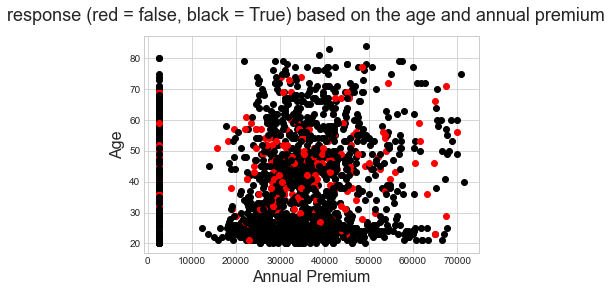

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

plt.style.use('seaborn-whitegrid')
import numpy as np

for i in range(len(coordinates)-1):
    if coordinates[i][2] == 0:
        plt.plot(coordinates[i][0],coordinates[i][1], 'o', color='black' ); #response 0
    else:
        plt.plot(coordinates[i][0],coordinates[i][1], 'o', color='red' ); #response 1
plt.suptitle('response (red = false, black = True) based on the age and annual premium', fontsize=18)
plt.xlabel("Annual Premium", fontsize = 16)
plt.ylabel("Age" ,fontsize = 16)
plt.show()

We can see that it is not lineraly separable so we will attempt to do feature engineering on these two features. 

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
PF=PolynomialFeatures(degree=2,interaction_only=True)
data_trans=PF.fit_transform(Clean[['Age','Annual_Premium']])

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

PF = PolynomialFeatures(degree=2,interaction_only=True,include_bias=False)
to_cross = ['Age', 'Annual_Premium']
crossed_feats = PF.fit_transform(Clean[to_cross].values)

#Convert to Pandas DataFrame and merge to original dataset
crossed_feats = pd.DataFrame(crossed_feats,columns=['X1','X2','Age_times_Annual'])
crossed_feats

,X1,X2,Age_times_Annual
0,44.0,40454.0,1779976.0
1,47.0,38294.0,1799818.0
2,21.0,28619.0,600999.0
3,29.0,27496.0,797384.0
4,24.0,2630.0,63120.0
...,...,...,...
452686,21.0,35767.0,751107.0
452687,26.0,30867.0,802542.0
452688,38.0,28700.0,1090600.0
452689,21.0,29802.0,625842.0


In [ ]:
Clean = pd.concat([Clean, crossed_feats], axis=1)
Clean=Clean[['Age', 'Region_Code' ,'Vehicle_Age_Ordinal','Annual_Premium','Policy_Sales_Channel', 'Vintage', 'Gender_Female','Gender_Male', 'Driving_License_0', 'Driving_License_1', 'Previously_Insured_0','Previously_Insured_1', 'Vehicle_Damage_No' ,'Vehicle_Damage_Yes','Age_times_Annual','Response']]
Clean.head()

,Age,Region_Code,Vehicle_Age_Ordinal,Annual_Premium,Policy_Sales_Channel,Vintage,Gender_Female,Gender_Male,Driving_License_0,Driving_License_1,Previously_Insured_0,Previously_Insured_1,Vehicle_Damage_No,Vehicle_Damage_Yes,Age_times_Annual,Response
0,44,28,2.0,40454,26,217,0,1,0,1,1,0,0,1,1779976.0,1
1,47,28,2.0,38294,26,27,0,1,0,1,1,0,0,1,1799818.0,1
2,21,11,1.0,28619,152,203,0,1,0,1,0,1,1,0,600999.0,0
3,29,41,1.0,27496,152,39,1,0,0,1,0,1,1,0,797384.0,0
4,24,33,1.0,2630,160,176,1,0,0,1,1,0,0,1,63120.0,0


In [ ]:
Clean.to_csv("Clean Transformed.csv", index=False, encoding='utf-8-sig')

In [ ]:
Clean=pd.read_csv('D:/cmps 276/new data- salim/Clean transformed.csv')

In [ ]:
len(Clean.columns)

16

In [ ]:
Annual_Premium = np.array(Clean.Annual_Premium)
Age = data = np.array(Clean.Age)
x3 = np.array(Clean.Age_times_Annual)
Response = np.array(Clean.Response)

In [ ]:
annualpremium_x3 = []
for i in range(2000):
    temp = []
    temp.append(Annual_Premium[i])
    temp.append(x3[i])
    temp.append(Response[i])
    annualpremium_x3.append(temp)

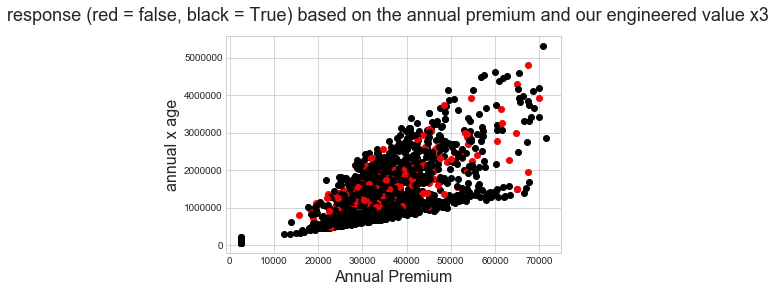

In [ ]:

plt.style.use('seaborn-whitegrid')

for i in range(len(annualpremium_x3)-1):
    if annualpremium_x3[i][2] == 0:
        plt.plot(annualpremium_x3[i][0],annualpremium_x3[i][1], 'o', color='black' ); #response 0
    else:
        plt.plot(annualpremium_x3[i][0],annualpremium_x3[i][1], 'o', color='red' ); #response 1
plt.suptitle('response (red = false, black = True) based on the annual premium and our engineered value x3', fontsize=18)
plt.xlabel("Annual Premium", fontsize = 16)
plt.ylabel("annual x age" ,fontsize = 16)
plt.show()

In [ ]:
age_x3 = []
for i in range(2000):
    temp = []
    temp.append(Age[i])
    temp.append(x3[i])
    temp.append(Response[i])
    age_x3.append(temp)

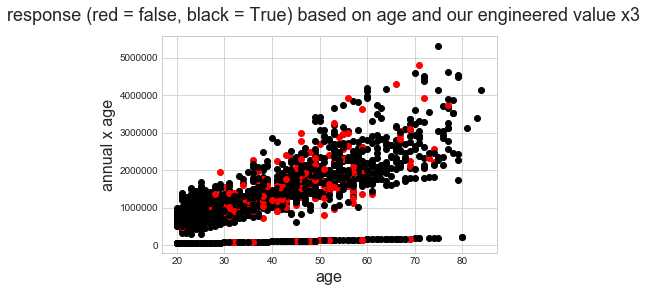

In [ ]:
plt.style.use('seaborn-whitegrid')

for i in range(len(annualpremium_x3)-1):
    if age_x3[i][2] == 0:
        plt.plot(age_x3[i][0],age_x3[i][1], 'o', color='black' ); #response 0
    else:
        plt.plot(age_x3[i][0],age_x3[i][1], 'o', color='red' ); #response 1
plt.suptitle('response (red = false, black = True) based on age and our engineered value x3', fontsize=18)
plt.xlabel("age", fontsize = 16)
plt.ylabel("annual x age" ,fontsize = 16)
plt.show()

#Part 5 - Dimensionality Reduction 

## Principal Component Analysis (PCA) 
Principal Component Analysis (PCA) is a method for reducing the dimensionality of data. 
In PCA, data with 𝑚-columns (features) is projected into a subspace with 𝑚 or fewer columns, whilst retaining the essence of the original data.

Many statistical models suffer from a high correlation between covariates, PCA can be used to produce linear combinations of the covariates that are uncorrelated between each other.
In PCA, we simplify a dataset with many variables by turning the original variables into a smaller number of "Principal Components".

First We need to do some data encoding for the sake of the PCA, we willd do it using dummy encoding

In [109]:
dfCT = pd.read_csv("/content/drive/My Drive/CMPS 276 Project/Nov 4/Datasets/Clean Transformed.csv")
dfCT.Vehicle_Age_Ordinal
res = ['Response']
input_Variables = [x for x in dfCT.columns if x not in res]

In [ ]:
coldict_dummy = {'Age':'red', 'Gender_Female':'red','Gender_Male':'red',
                 'Driving_License_0':'red','Driving_License_1':'red',
                'Previously_Insured_0':'blue','Previously_Insured_1':'blue',
                'Vehicle_Damage_No':'blue', 'Vehicle_Damage_Yes':'blue',
                'Vehicle_Age_Ordinal':'blue','Region_Code':'blue',
                'Annual_Premium':'blue','Policy_Sales_Channel':'green',
                 'Vintage':'green','Response':'red',
                 'Age_times_Annual':'pink'}

dfCT = dfCT[['Age','Gender_Female','Gender_Male',
                     'Driving_License_0','Driving_License_1',
                     'Previously_Insured_0','Previously_Insured_1',
                     'Vehicle_Damage_No','Vehicle_Damage_Yes',
                     'Vehicle_Age_Ordinal','Region_Code',
                     'Annual_Premium','Policy_Sales_Channel',
                     'Vintage','Response','Age_times_Annual']]

dfCT[input_Variables] = minmax_scaling(dfCT, columns=input_Variables)

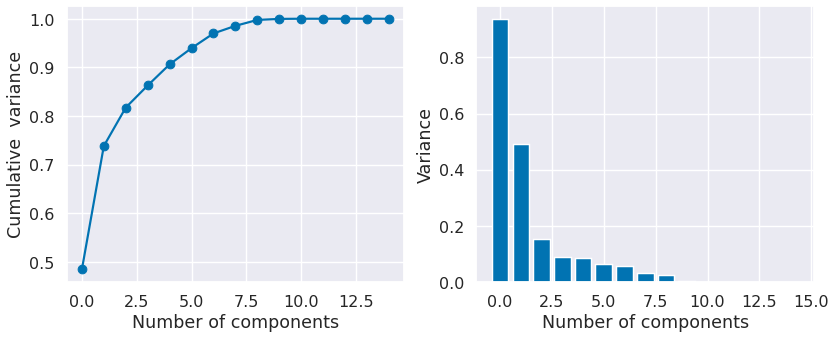

In [172]:
pca = PCA().fit(dfCT[input_Variables])
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5), dpi=70, facecolor='w', edgecolor='k')

ax0, ax1 = axes.flatten()


ax0.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
ax0.set_xlabel('Number of components')
ax0.set_ylabel('Cumulative  variance')

ax1.bar(range(dfCT[input_Variables].shape[1]),pca.explained_variance_)
ax1.set_xlabel('Number of components')
ax1.set_ylabel('Variance')
# we use the tight layout to change the scale from 2.5 to 2 on the x-axis. 
plt.tight_layout()
plt.show()

We can determine by referring to plot graph to the left, that the comulative variance reaches 90% at 4 components. Where the bar graph to the right shows the variance of each component.In conclusion, the left graph is the cumulative sum of the component’s variables found in the right graph. We’ve determined that choosing 4 components is the most suitable number of components according to our dataset.

In [147]:
n_PCA_90 = np.size(np.cumsum(pca.explained_variance_ratio_)>0.9) - np.count_nonzero(np.cumsum(pca.explained_variance_ratio_)>0.9)
print("Already: " + format(n_PCA_90) + " components cover 90% of variance.")

Already: 4 components cover 90% of variance.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  if __name__ == '__main__':


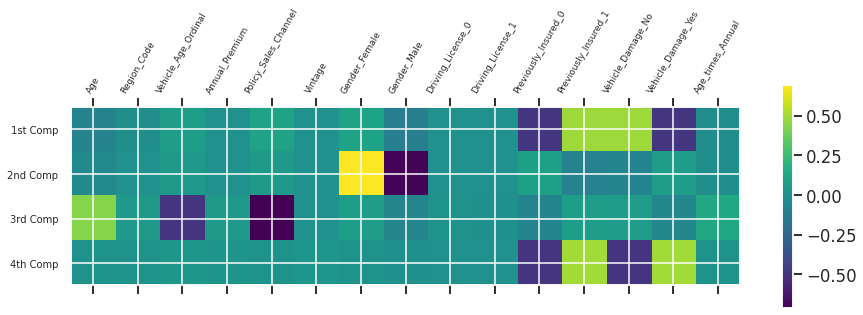

In [132]:
#transforming the data gathered from the PCA model into a table showing the strong relations between components
pca = PCA(4).fit((dfCT[input_Variables]))
X_pca=pca.transform((dfCT[input_Variables])) 

plt.matshow(pca.components_,cmap='viridis')
plt.yticks([0,1,2,3],['1st Comp','2nd Comp','3rd Comp','4th Comp'],fontsize=10)
plt.colorbar()

plt.xticks(range(0,15),input_Variables,fontsize=9,rotation=60)
plt.tight_layout()
plt.show()

By referring to the above table with different colors that the heavy yellow means that the relationship is strong, light green means strong, between blue and green the relation is weak whereas the blue implies that there's no relation. Same for the negative value, by moving from light blue to violet the relationship becomes stronger.  
 
We can determine from the following results by referring to the above table plot: 
Gender feature contributes to at least two components. 
Age feature contributes to at least three components, same for the vehicle damage and policy sales channel feature, they all contribute to at least 3 components.
previously insured feature and vehicle damage feature contribute to at least four components.


## Correlation Check
We will us Spearman correlation as its rank nature counter-acts for linearity assumption 

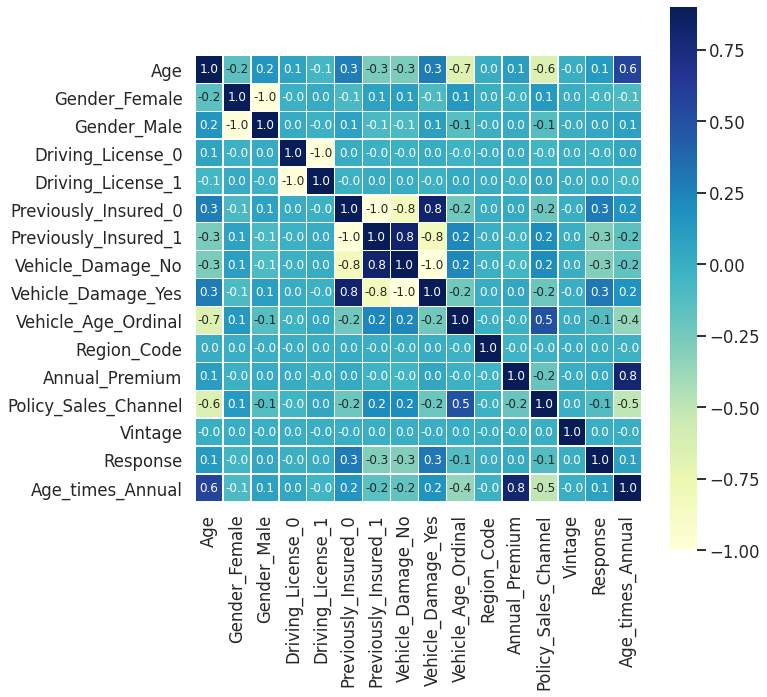

In [150]:
SpearmanCorr = dfCT.corr(method="spearman")
matplotlib.pyplot.figure(figsize=(10,10))
sns.heatmap(SpearmanCorr, vmax=.9, square=True, annot=True, linewidths=.3, cmap="YlGnBu", fmt='.1f')

### Analysis
The following Table represents the correlation between different features. As the color moves from the light blue towards the violet or the light yellow color, the correlation becomes stronger. So after interpreting the following results, we can determine that:
Age strongly correlates with Policy_Sales_Channel features which mean young people use the internet and new services where the old people still use the old way by asking people for help like specified agents.

* Age correlates with Vehicle age, this means that young people drive old cars.

* Previously insured is correlates strongly with vehicle damage, which implies that a lot of policyholders change the insurer while they correspond to a big risk.

* The policy channel feature with vehicle age shows a strong correlation. 

* Finally, the new column Age_Times_Annual correlates with the policy channel, which was shown before that policy channel correlates with age but by crossing with the annual premium we can have a better correlation between them. 
 
 


## Modifiying Data

In [164]:
#Generating the Final Data Frame
#We will be dropping the Region Code Column and Modifying Column Names
FinalDF = dfCT
FinalDF = FinalDF.rename(columns={'Driving_License_0':'Driving_License_No',
                        'Driving_License_1':'Driving_License_Yes',
                        'Previously_Insured_0':'Previously_Insured_No',
                        'Previously_Insured_1':'Previously_Insured_Yes',
                        'AgexAnnual':'Age_Times_Annual'})
FinalDF = FinalDF.drop('Region_Code',axis=1)

In [166]:
FinalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452691 entries, 0 to 452690
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     452691 non-null  float64
 1   Gender_Female           452691 non-null  float64
 2   Gender_Male             452691 non-null  float64
 3   Driving_License_No      452691 non-null  float64
 4   Driving_License_Yes     452691 non-null  float64
 5   Previously_Insured_No   452691 non-null  float64
 6   Previously_Insured_Yes  452691 non-null  float64
 7   Vehicle_Damage_No       452691 non-null  float64
 8   Vehicle_Damage_Yes      452691 non-null  float64
 9   Vehicle_Age_Ordinal     452691 non-null  float64
 10  Annual_Premium          452691 non-null  float64
 11  Policy_Sales_Channel    452691 non-null  float64
 12  Vintage                 452691 non-null  float64
 13  Response                452691 non-null  int64  
 14  Age_times_Annual    

In [174]:
FinalDF.to_csv( "/content/drive/My Drive/CMPS 276 Project/Nov 4/Final Data.csv", index=False, encoding='utf-8-sig')

# Part 6 - Statistical exploratory data analysis

Exploratory data analysis (EDA) is a critical part of the data science process, and the first step toward building a model. The basic tools of EDA are plots, graphs, and summary statistics. 
Our Data Analysis is performed on the data before data transofrmation

## First Some Data Preperation for EDA


In [348]:
#FirstWe Define The Dataset 
df = pd.read_csv("/content/drive/My Drive/CMPS 276 Project/Nov 4/Datasets/fixed.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 471467 entries, 0 to 471466
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    471467 non-null  int64  
 1   Gender                471467 non-null  object 
 2   Age                   471467 non-null  int64  
 3   Driving_License       471467 non-null  int64  
 4   Region_Code           471467 non-null  int64  
 5   Previously_Insured    471467 non-null  int64  
 6   Vehicle_Age           471467 non-null  object 
 7   Vehicle_Damage        471467 non-null  object 
 8   Annual_Premium        471467 non-null  float64
 9   Policy_Sales_Channel  471467 non-null  int64  
 10  Vintage               471467 non-null  int64  
 11  Response              471467 non-null  int64  
dtypes: float64(1), int64(8), object(3)
memory usage: 43.2+ MB


In [ ]:
C = (df.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (df.dtypes == 'int64') 
Float   = (df.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

####Here we're trying to differentiate between the categorical and the numeric variables, so we can perform some dummy coding later on for data analysis. 

In [ ]:
CategoricalVariables

['Gender', 'Vehicle_Age', 'Vehicle_Damage']

In [ ]:
df.Vehicle_Age.unique()

array(['> 2 Years', '1-2 Year', '< 1 Year'], dtype=object)

In [ ]:
#Changing 'Vehcile Age' to numerical
Vehicle_Age_map  = {'< 1 Year':0,'1-2 Year':1,'> 2 Years':2}

df['Vehicle_Age'] = df['Vehicle_Age'].map(Vehicle_Age_map)
df=df.set_index("id")

C = (df.dtypes == 'object')
CategoricalVariables = list(C[C].index)

Integer = (df.dtypes == 'int64') 
Float   = (df.dtypes == 'float64') 
NumericVariables = list(Integer[Integer].index) + list(Float[Float].index)

df.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
id,,,,,,,,,,,
1,Male,44,1,28,0,2,Yes,40454.0,26,217,1
2,Male,76,1,3,0,1,No,33536.0,26,183,0
3,Male,47,1,28,0,2,Yes,38294.0,26,27,1
4,Male,21,1,11,1,0,No,28619.0,152,203,0
6,Female,24,1,33,0,0,Yes,2630.0,160,176,0


####We changed the age(categorical variable) into a numerical, so we plot some graphs and interpret the results. 

## Now The Data is ready for some Data Analysis 

In [350]:
df['Annual_Premium']

0         40454.0
1         33536.0
2         38294.0
3         28619.0
4          2630.0
           ...   
471462    30867.0
471463    28700.0
471464    29802.0
471465    62875.0
471466    27927.0
Name: Annual_Premium, Length: 471467, dtype: float64

### Vehcile Age and Annyal Premium vs Vehcile Damage

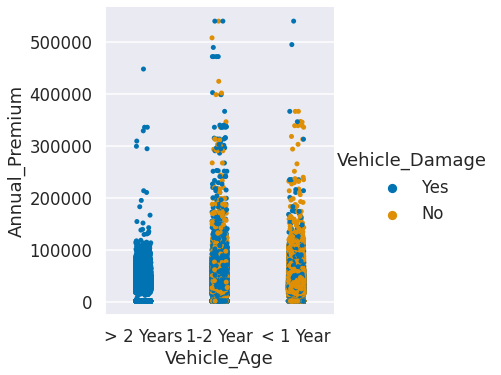

In [360]:
sns.catplot(x = 'Vehicle_Age', y = 'Annual_Premium', hue = 'Vehicle_Damage',data = df)

Vehicle Age between 0 - 2 has a higher and stable Annual Premium, people tend to be more taking care of their cars, wherears when Age > 2, customers are more focosed on lower price services where can enoughly cover the basic requirments.

### Vehicle Age


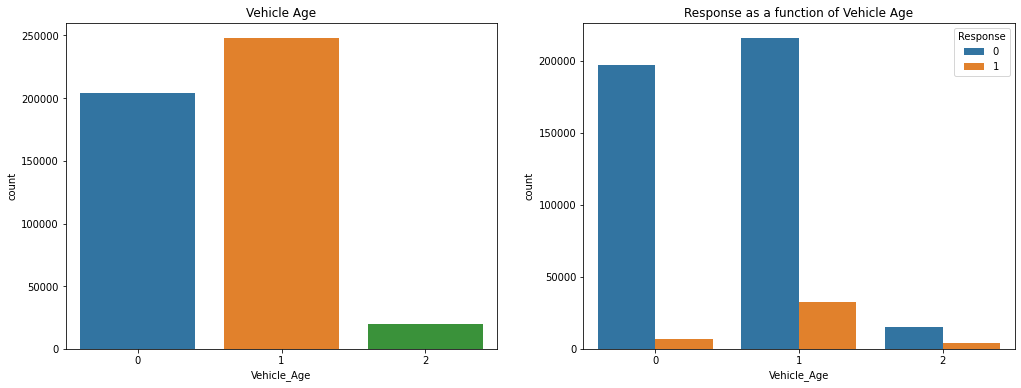

In [ ]:
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(17,6))
vax = ax.flatten()
left = sns.countplot(x = df['Vehicle_Age'],ax=vax[0]).set_title("Vehicle Age")
right = sns.countplot(x = df['Vehicle_Age'], hue = df['Response'], ax=vax[1]).set_title("Response as a function of Vehicle Age")





By referring to the left subplot, we can determine that the number of people who may be interested in this service have new cars and not old ones. But, in the subplot to the right we can determine that people having vehicles 1-2 years old are more interested in this service than people with fresh new cars and more than 2 years old cars. 

### Vehcile Damage

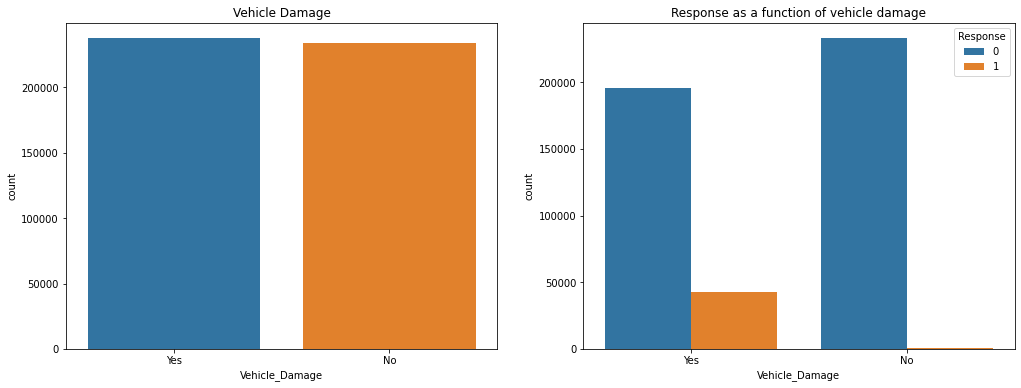

In [ ]:
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(17,6))
vax = ax.flatten()
left = sns.countplot(x = df.Vehicle_Damage,ax=vax[0]).set_title("Vehicle Damage")
right = sns.countplot(x = df.Vehicle_Damage, hue = df.Response,ax=vax[1]).set_title("Response as a function of vehicle damage")

By referring to the subplots in the vehicle age section and the subplot in the vehicle damage section, we can conclude that we the >2 years is a minority whereas the condition of the vehicles is equally distributed. the customers who are most interested have their 1-2 years vehicle damaged.

### Results By Gender

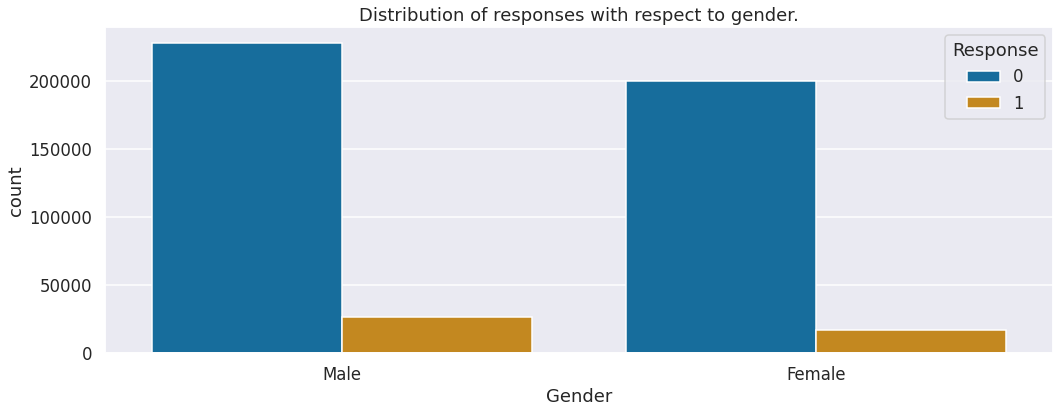

In [338]:
fig, ax = plt.subplots(figsize=(17,6))
Mid = sns.countplot(x = df.Gender, hue = df.Response ).set_title("Distribution of responses with respect to gender.")

By referring to "Distribution of responses with respect to gender" subplot, can show us that our male population is more than the female, and males are more interested in this service than females. In conclusion, the males are more interested in car insurance, might reflect that their spouses rely on couple subcriptions.

### Region Code

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


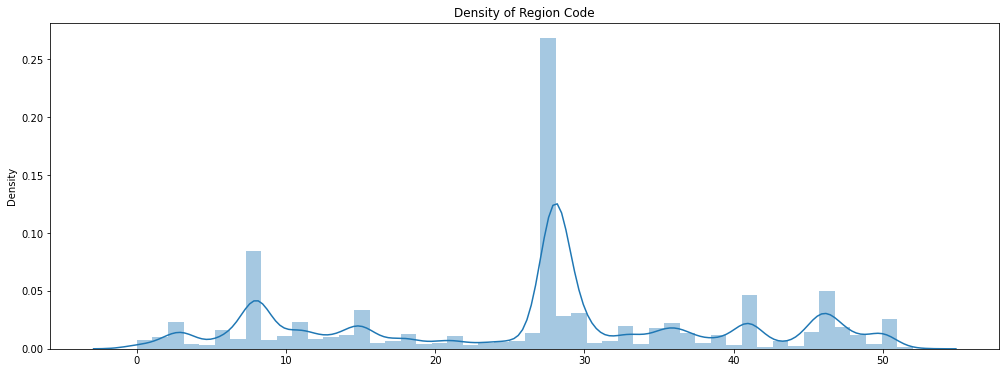

In [ ]:
fig, ax = plt.subplots(figsize=(17,6))
mid = sns.distplot(x = df.Region_Code).set_title("Density of Region Code")

By referring to the above distplot "Density of Region Code", we can determine that a region is very dominant in the dataset. Where region code might reflect the quality of the neighborhood.

### Previously Insured

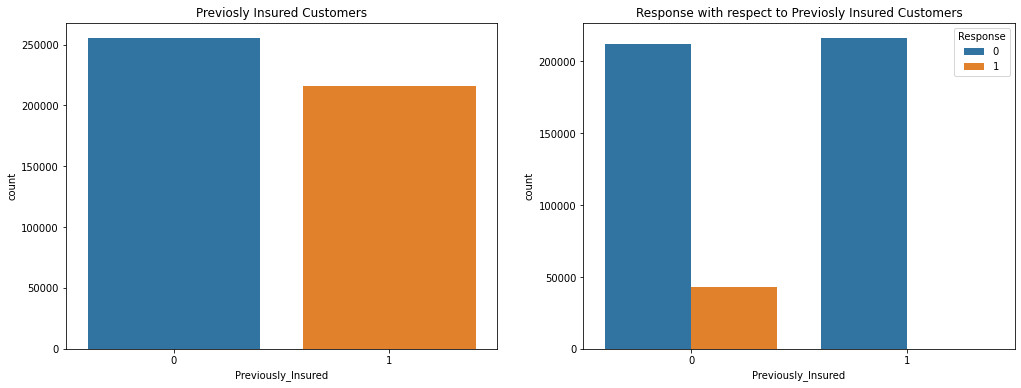

In [ ]:
f,ax = plt.subplots(nrows=1,ncols=2,figsize=(17,6))
vax = ax.flatten()
left = sns.countplot(x = df.Previously_Insured , ax=vax[0]).set_title("Previosly Insured Customers")
right = sns.countplot(x = df.Previously_Insured, ax=vax[1] ,hue = df.Response).set_title("Response with respect to Previosly Insured Customers")

After checking both countplots, we can determine that customers who weren't previously insured are more interested, where people who are insured already are not interested at all. Maybe, this means that the quality of this service is not good enough to compete other insurance competitors.

### Driving License

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


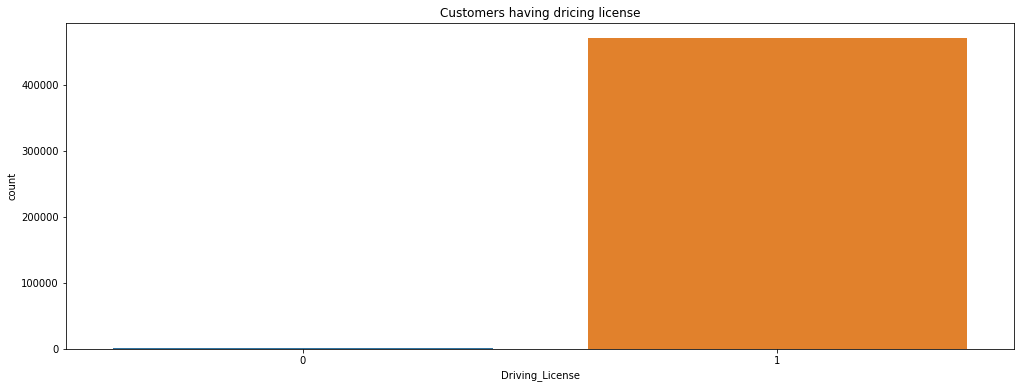

In [ ]:
fig, ax = plt.subplots(figsize=(17,6))
mid = sns.countplot(df.Driving_License).set_title("Customers having dricing license")


We can determine directly, that mostly all customer have driving license

### Number of Days the Customer has been associated with the company

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


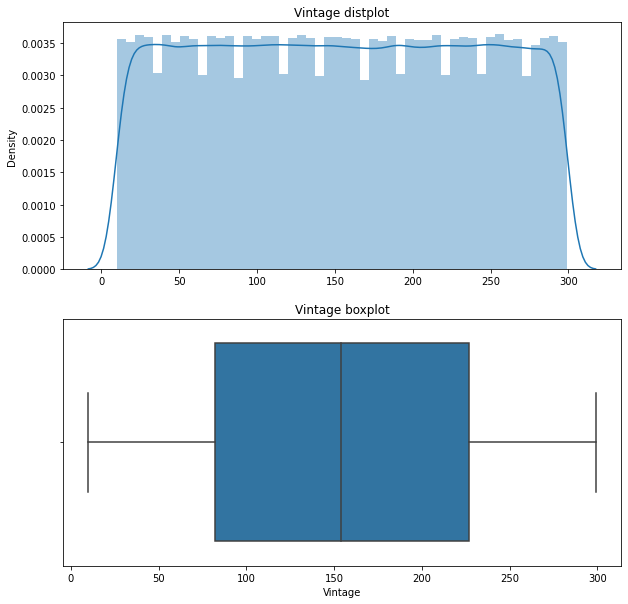

In [ ]:
f,ax = plt.subplots(nrows=2,ncols=1,figsize=(10,10))
vax = ax.flatten()
top = sns.distplot(x = df.Vintage,ax=vax[0]).set_title("Vintage distplot")
bottom = sns.boxplot(x = df.Vintage,ax=vax[1]).set_title("Vintage boxplot")

By referring to the above to graphs, we can determine that our customer are equaly distrbuted. Where the density in the distplot, is somehow equa =l all over the number of vintage.  

### Age

<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
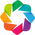

:Distribution   [Age]   (Density)

In [ ]:
hv.extension("bokeh")
hv.Distribution(df['Age'],label="Age").opts(opts.Distribution(xlabel="Values", ylabel="Density", width=600, height=600))

By referring to the above distribution, we can determine that the graph is highly skewed towards the young ages, where the most frequent users are with age = 23 years old. Where the second most frequent users are the users with age = 45. Where the least are the old users 65 years old and above. In conclusion, new generation approaches finance & health in modern way whereas older generations are still afraid.

# Part 7 -Pattern Analysis using kmeans clustering

Clustering is an unsupervised machine learning process that automatically divides data into clusters or groupings of similar items. It does this without having been told what the groups should look like ahead of time.
The resulting clusters can then be used for action customer segmentation, anomaly behavior, Simplifying extremely large datasets by grouping a large number of features with similar values into a much smaller number of homogeneous categories.


In [179]:
FinalDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 452691 entries, 0 to 452690
Data columns (total 15 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   Age                     452691 non-null  float64
 1   Gender_Female           452691 non-null  float64
 2   Gender_Male             452691 non-null  float64
 3   Driving_License_No      452691 non-null  float64
 4   Driving_License_Yes     452691 non-null  float64
 5   Previously_Insured_No   452691 non-null  float64
 6   Previously_Insured_Yes  452691 non-null  float64
 7   Vehicle_Damage_No       452691 non-null  float64
 8   Vehicle_Damage_Yes      452691 non-null  float64
 9   Vehicle_Age_Ordinal     452691 non-null  float64
 10  Annual_Premium          452691 non-null  float64
 11  Policy_Sales_Channel    452691 non-null  float64
 12  Vintage                 452691 non-null  float64
 13  Response                452691 non-null  int64  
 14  Age_times_Annual    

Cluster 1 Inertia 844676.2479397755
Cluster 2 Inertia 456735.9299467653
Cluster 3 Inertia 333424.3827403537
Cluster 4 Inertia 233408.77141399359
Cluster 5 Inertia 197549.43464252495
Cluster 6 Inertia 181371.58933491446
Cluster 7 Inertia 166635.87981026518
Cluster 8 Inertia 154286.41975682255
Cluster 9 Inertia 139921.76255777787
Cluster 10 Inertia 125512.3506455305
Cluster 11 Inertia 114114.87601211946
Cluster 12 Inertia 105615.40386905627
Cluster 13 Inertia 99646.6019262251
Cluster 14 Inertia 93886.10740973712


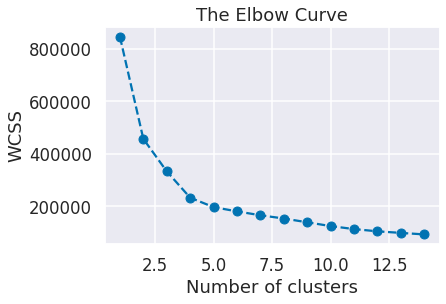

In [328]:
from sklearn import model_selection
from sklearn.neighbors import KNeighborsClassifier

#Spliting the Data into input and output
X = FinalDF.drop('Response',axis=1)
y = FinalDF['Response']

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.2,random_state=42)
wcss = []
for i in range(1,15):
 kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=400,n_init=15,random_state=42)
 kmeans.fit(X)
 wcss.append(kmeans.inertia_)
 print('Cluster', i, 'Inertia', kmeans.inertia_)
plt.plot(range(1,15),wcss,'--bo')
plt.title('The Elbow Curve')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') ##WCSS stands for total within-cluster sum of square
plt.show()

In [376]:
#We can see that the best number of clusters is 4
X = FinalDF.values
kmeans=KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

<Figure size 432x432 with 0 Axes>

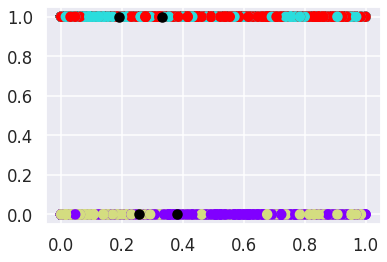

<Figure size 432x432 with 0 Axes>

In [378]:
import matplotlib.patches as mpatches
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')
plt.figure(figsize=(6,6))


## Analysis
Using the elbow method, we identified that the Data is best distributed into 4 clusters. These clusters were distributed into two groups where two clusters where people responded positively and agreed to get car insurance from their same health insurance providers and Two other clusters where they responded negatively.
The centroids of the clusters where pretty close in each group and the data points scattered along with the plot,  we could also find 	that the four centroids are in the first half of the X axis (between 0 and 0.5)